In [3]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation

In [4]:
# Don't pay attention to this
# This is to keep kernel from dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
mnist.train.images.shape

(55000, 784)

In [10]:
mnist.train.labels.shape # There are 10 classes which are one hot encoded for whole training data  

(55000, 10)

In [11]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [28]:
test = mnist.test.images.reshape(10000,28,28,1)
train = mnist.train.images.reshape(55000,28,28,1)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

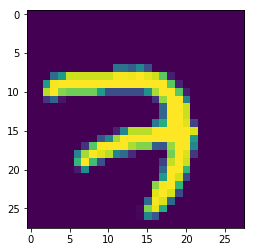

In [14]:
# Lets see first image of training data
first_image = mnist.train.images[0]
first_image = np.array(first_image , dtype = 'float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [35]:
def createmodel(inshape,nclasses):
    model = Sequential()
    model.add(Conv2D(32,(5,5),padding = 'same',activation = 'relu',input_shape = inshape))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(64,(5,5),padding = 'same',activation = 'relu',input_shape = inshape))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(1024,activation = 'relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(nclasses,activation = 'relu'))
    
    return model

In [36]:
model = createmodel((28,28,1),10)

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
__________

In [39]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(train,mnist.train.labels,epochs = 30,batch_size = 100)